# Vertex Cover Linear Approximation Algorithm 
by Gabriel Yohe (gjy7kb)

**Resources:**

Coursera Course: "Approximation Algorithms" by Claire Mathieu via Ecole Normale Superieure

Book: Introduction To Algorithms by Thomas Cormen, Charles Leiserson, Ronald Rivest, Clifford Stien

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pulp as pulp

### The Problem at Hand:
Say we have an undirected graph with 10 nodes:

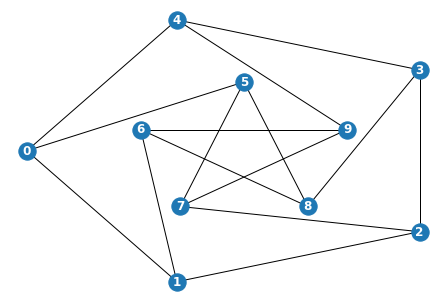

In [2]:
G = nx.petersen_graph()
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold', font_color='white')

Then what is the minimal amount of vertices needed to have every edge connected to a vertice? The **vertex cover** is this subset of vertices. 

It has been shown that finding a solution for this problem is closely rated to problems found in DNA research, but it is also a good gateway into thinking about other linear approximation algorithms. 

A brute force solution of checking every edge and every vertex would quickly turn NP-hard. So we need to think of this problem in a new way. 

## Breaking it Down

Lets look at just two nodes with one edge:

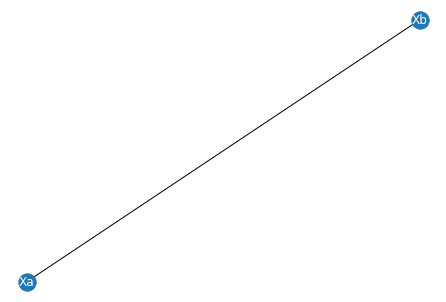

In [3]:
two = nx.Graph()
two.add_nodes_from(['Xa','Xb'])
two.add_edge("Xa",'Xb')
nx.draw_shell(two,with_labels=True, font_color='white')

Here is how we can break down this problem mathematically: 

|Xa|Xb|Edge Covered?|Xa+Xb|
|:-:|:-:|:-:|:-:|
|0|0|no|0|
|1|0|yes|1|
|0|1|yes|1|
|1|1|yes|2|

Where Xa and Xb represents the two vertices.


0 or 1 represents whether the vetex is in the cover subset (if $X\geq1$ then 'yes'. If vertices are weighted, their values can be greater than 1)


We can see from this that in all but the first instance, the edge is covered.

Now we can begin to imagine what we need to minimize: 

$$min(\sum_{u}w_u*x_u)$$ Where $w_u$ is the weights on each Vertex

**With Constraints:**

$$\forall u \in V : x_u = \text{0 or 1}$$

$$\forall(u,v) \in E : x_u + x_v \geq 1$$

This problem, as we can see now, is **NP-Hard** since it requires integer programming. So we want to see if there is a way to find an approximate solution that doesnt have an exponential runtime. 

We can do this by using linear programming and relaxing our constraint: 

$$\forall u \in V : x_i = \text{0 or 1}$$

$$\text{to}$$

$$\forall u \in V :0 \leq x_u \leq 1$$

This relaxes the integer constraint and allows for suboptimal solutions.

In order to decide if a vertex is in the vertex cover, we simply round to the nearest integer. 

## Outline of Algorithm

1. **Solve Linear Program**

    $(x_u^*)u \in V$ such that

    $\forall u \in V :0 \leq x_u^* \leq1$

    $\forall(u,v) \in E : x_u^* + x_v^* \geq 1$

    $min(\sum_{u}{}w_u*x_u)$



2. **Round the LP Solution**
    $(z_u)u \in V$ defined by:

$$z_u =
\begin{cases}
1       & \quad \text{if }x_u^*\geq.5\\
0       & \quad \text{otherwise}
\end{cases}
$$
    
3. **Output**

    $\{u\in V \text{such that } z_u=1 \}$

## Building the Algorithm
    Vertex Cover Approximation Algorithm 

In [4]:
V= np.array([1,2,1,4,1,4,3,5,6,11]) 
edges = np.array(G.edges())


def VertexCoverLP(Weights, Edges):
    
    '''This Vertex Cover returns a Pulp object.
    The pulp object contains values between 0 and 1.
    These will also be returned as min_nodes which returns
    the specific vertices needed to cover all nodes. 
    Make sure Pulp is loaded for this to work'''
    
    #Build the model to minimize
    model = pulp.LpProblem("Vertex-Cover", sense = pulp.LpMinimize)
    
    #Create weights for the Vertices
    V = np.array(Weights)
    
    #Grab Edges from the Peterson Graph
    edges = np.array(Edges)
    
    #Create list of Vertex names
    x_name = []
    for i in range(0,len(V)):
        x_name.append("x_{}".format(str(i)))

    #Create Continuous Variales bound below by 0 and above by 1
    x = [pulp.LpVariable(x_name[i], lowBound = 0, upBound = 1, cat='Continuous') for i in range(0,len(V))]
    
    #Create condition that every two nodes connected by an edge sum to a value greater than 1  
    for i in range(0,len(edges)):
        model += (x[edges[i][0]]+x[edges[i][1]] >= 1)

    #Built in function to create our sum
    c = pulp.LpAffineExpression([(x[i],V[i])for i in range(0,len(V))]) 
    
    #Add optimization funciton (c) to model. 
    model += c  
    
    #Solve Model
    status = model.solve()
    print(pulp.LpStatus[status])
    #Get min Nodes
    #Use vertices whose x value is .5 or greater
    min_nodes = []
    for var in model.variables():
        if var.value() >= .5:
            min_nodes.append(var.name)
    
    
    return(model, min_nodes)
    
    

In [5]:
model, min_nodes = VertexCoverLP(V,edges)

Optimal


### Our Constraints and Function to be Minimized

In [6]:
model

Vertex-Cover:
MINIMIZE
1*x_0 + 2*x_1 + 1*x_2 + 4*x_3 + 1*x_4 + 4*x_5 + 3*x_6 + 5*x_7 + 6*x_8 + 11*x_9 + 0
SUBJECT TO
_C1: x_0 + x_1 >= 1

_C2: x_0 + x_4 >= 1

_C3: x_0 + x_5 >= 1

_C4: x_1 + x_2 >= 1

_C5: x_1 + x_6 >= 1

_C6: x_2 + x_3 >= 1

_C7: x_2 + x_7 >= 1

_C8: x_3 + x_4 >= 1

_C9: x_3 + x_8 >= 1

_C10: x_4 + x_9 >= 1

_C11: x_5 + x_7 >= 1

_C12: x_5 + x_8 >= 1

_C13: x_6 + x_8 >= 1

_C14: x_6 + x_9 >= 1

_C15: x_7 + x_9 >= 1

VARIABLES
x_0 <= 1 Continuous
x_1 <= 1 Continuous
x_2 <= 1 Continuous
x_3 <= 1 Continuous
x_4 <= 1 Continuous
x_5 <= 1 Continuous
x_6 <= 1 Continuous
x_7 <= 1 Continuous
x_8 <= 1 Continuous
x_9 <= 1 Continuous

### Here are the nodes we will select to cover all edges

In [7]:
#Use vertices whose x value is .5 or greater
print(min_nodes)
print('')     
print('Number of Minimum Nodes:', len(min_nodes))

['x_0', 'x_2', 'x_4', 'x_6', 'x_7', 'x_8']

Number of Minimum Nodes: 6


In [8]:
#Minimal Sum
pulp.value(model.objective.value()) 

17.0

## Graph of Results

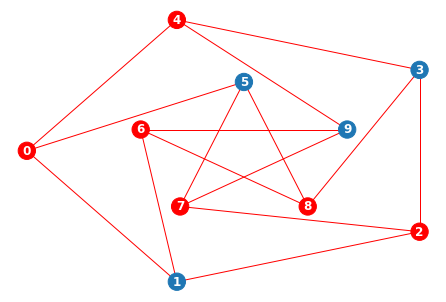

In [9]:
#Using Vertices from algorithm
val_map = {0: 'r',
           2: 'r',
           4: 'r',
           6: 'r',
           7: 'r',
           8: 'r',
          }

values = [val_map.get(node, 'tab:blue') for node in G.nodes()]
nx.draw_shell(G, nlist=[range(5, 10), range(5)], node_color=values,
              edge_color='r', with_labels=True, 
              font_color='white',font_weight='bold')

As you can see above, all edges are covered. This also happens to be the optimal solution.

## Worst Case
We can run into danger in worst case situations

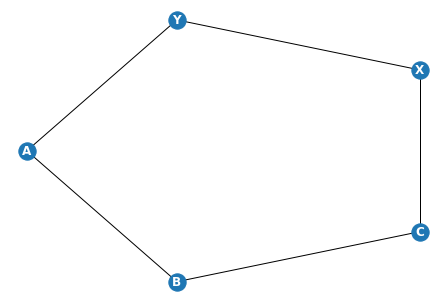

In [10]:
worst = nx.Graph()
worst.add_edges_from(
    [('A', 'B'), ('B', 'C'), ('C', 'X'), ('X', 'Y'), ('Y', 'A')])
nx.draw_shell(worst,with_labels=True, node_color='tab:blue',
              font_weight='bold', font_color='white')

**We can see that the minimal verticies required for all edges to be covered is only three**

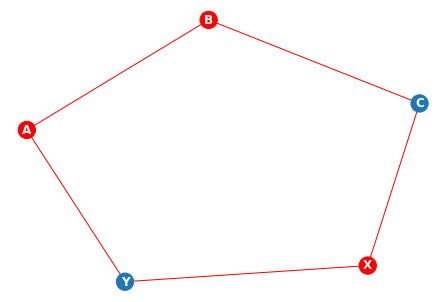

In [11]:
val_map = {'A': 'r',
           'B': 'r',
           'X': 'r',
          }

values = [val_map.get(node, 'tab:blue') for node in worst.nodes()]
nx.draw(worst, node_color=values, edge_color='r', with_labels=True, 
        font_weight='bold', font_color='white')

In [12]:
my_lp_problem = pulp.LpProblem("MyLPProblem", pulp.LpMinimize)
a = pulp.LpVariable('a', lowBound=0, upBound = 1, cat='Continuous')
b = pulp.LpVariable('b', lowBound=0, upBound = 1, cat='Continuous')
c = pulp.LpVariable('c', lowBound=0, upBound = 1, cat='Continuous')
x = pulp.LpVariable('x', lowBound=0, upBound = 1, cat='Continuous')
y = pulp.LpVariable('y', lowBound=0, upBound = 1, cat='Continuous')

# Objective function

my_lp_problem += a + b +  c + x + y  

# Constraints
my_lp_problem += a + b >= 1
my_lp_problem += b + c >= 1
my_lp_problem += c + x >= 1
my_lp_problem += x + y >= 1
my_lp_problem += y + a >= 1


my_lp_problem.solve()

1

**This algorithms minumum will be 5 values of .5 and it will round up**

In [13]:
for variable in my_lp_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))

a = 0.5
b = 0.5
c = 0.5
x = 0.5
y = 0.5


**Unfortunately, this means we have a significantly sub-optimal solution**

In [14]:
num_vert=0
for var in my_lp_problem.variables():
    if var.value() >= .5:
        num_vert +=1
        print(f"{var.name}")
        
print("Number of Vertices:", num_vert)

a
b
c
x
y
Number of Vertices: 5


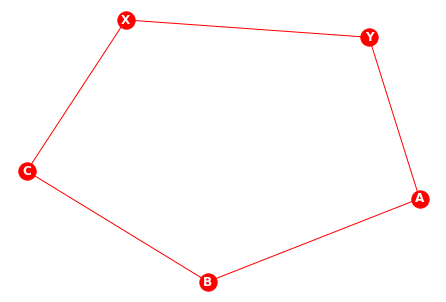

In [15]:
nx.draw(worst, node_color='r', edge_color='r', with_labels=True, 
        font_weight='bold', font_color='white')

**This is pretty far from the optimal solution**
We can double check our linear approximation solution with the integer solution:

In [16]:
my_lp_problemINT = pulp.LpProblem("my_lp_problemINT", pulp.LpMinimize)
a = pulp.LpVariable('a', lowBound=0, upBound = 1, cat='Integer')
b = pulp.LpVariable('b', lowBound=0, upBound = 1, cat='Integer')
c = pulp.LpVariable('c', lowBound=0, upBound = 1, cat='Integer')
x = pulp.LpVariable('x', lowBound=0, upBound = 1, cat='Integer')
y = pulp.LpVariable('y', lowBound=0, upBound = 1, cat='Integer')

# Objective function

my_lp_problemINT += a + b +  c + x + y  

# Constraints
my_lp_problemINT += a + b >= 1
my_lp_problemINT += b + c >= 1
my_lp_problemINT += c + x >= 1
my_lp_problemINT += x + y >= 1
my_lp_problemINT += y + a >= 1


my_lp_problemINT.solve()
num_vert=0
for var in my_lp_problemINT.variables():
    if var.value() >= .5:
        num_vert +=1
        print(f"{var.name}")
        
print("Number of Vertices:", num_vert)



b
x
y
Number of Vertices: 3


As it turns out, the worst case approximation is **two times** the optimal solution. 

We can prove this by considering: 
 $$z_u =
      \begin{cases}
        1       & \quad \text{if } x_u^* \geq.5\\
        0       & \quad \text{otherwise}
      \end{cases}
 $$
 
 
This means that $z_u$ must always be $\leq$ $2x_u^*$ which happens when $x_u^*$ equals one half as seen earlier. 

Thus, if follows: 

$$\text{Output Cost} = \sum_{u}w_u z_u \leq 2\sum_{u}w_u x_u^* \leq 2\text{Optimum}$$
 

However, the algorithm always covers all edges, even if it is not optimal. 




Time complexity of Linear solve is polonomial, and the time complexity of rounding is linear, so our algorithm runs in polonomial time. This is the advantage of linear approximation over the integer solution which is NP-Hard.